In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from sklearn.metrics import accuracy_score

In [88]:
ds = pd.read_csv('Epileptic Seizure Recognition.csv')
ds.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [89]:
# ds.columns

In [90]:
# ds.info()
ds.shape

(11500, 180)

In [91]:
# ds['Unnamed']
ds.drop('Unnamed', axis=1, inplace=True)

In [92]:
# print(list(ds.columns))

In [93]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.7 MB


In [94]:
# ds.isna()
# ds.isnull()
# ds.dtypes
# ds.describe()
# ds['y'].unique()
# ds['y'].value_counts()


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler

X = ds.drop('y', axis = 1)
Y = ds['y']
# X.head()
# Y.head()

In [96]:
ss = StandardScaler()
x = ss.fit_transform(X)

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.4)

In [98]:
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p = 2)
KNNclassifier.fit(X_train,Y_train)
# joblib.dump(KNNclassifier, 'KNN.joblib');
KNN_predictions = KNNclassifier.predict(X_test)
accuracy =  {
    "KNN" : accuracy_score(Y_test, KNN_predictions)
}


In [99]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
Gauss = GaussianNB()
Gauss.fit(X_train, Y_train)
Gpredict = Gauss.predict(X_test)
accuracy['Gaussian'] = accuracy_score(Y_test, Gpredict)

In [100]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, Y_train)


SVC(gamma='auto')

In [101]:
clfpredict = clf.predict(X_test)
accuracy['SVM'] = accuracy_score(Y_test, clfpredict)
accuracy['SVM']

0.19521739130434781

In [107]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=0)
DTC.fit(X_train, Y_train)
treepredict = DTC.predict(X_test)
accuracy["DecisionTreeClassifier"] = accuracy_score(Y_test, treepredict)
accuracy["DecisionTreeClassifier"]

0.45413043478260867

In [131]:
decision_tree = DecisionTreeClassifier(criterion="entropy", random_state=0)
decision_tree.fit(X_train, Y_train)
decision_predict = decision_tree.predict(X_test)
score = accuracy_score(Y_test, decision_predict)
score

0.4667391304347826

In [114]:
from sklearn.ensemble import RandomForestClassifier
Ranfor = RandomForestClassifier()
Ranfor.fit(X_train, Y_train)
Fpredict = Ranfor.predict(X_test)
accuracy['RandomForest'] = accuracy_score(Y_test, Fpredict)
accuracy['RandomForest']

0.6780434782608695

In [127]:
forest = RandomForestClassifier(criterion="entropy")
forest.fit(X_train,Y_train)
s = forest.predict(X_test)
accuracy['RandomForestEntropy'] = accuracy_score(Y_test, s)
accuracy['RandomForestEntropy']

0.6856521739130435

In [108]:
print(X_train.shape,treepredict.shape,Y_test.shape)
treepredict.shape

(6900, 178) (4600,) (4600,)


(4600,)

In [115]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Fpredict)
cm

array([[862,  15,   7,  18,   0],
       [ 56, 504, 252,  30, 104],
       [ 16, 222, 494,  45, 121],
       [  4,  21,  20, 675, 209],
       [  1,  64, 106, 170, 584]], dtype=int64)

[]

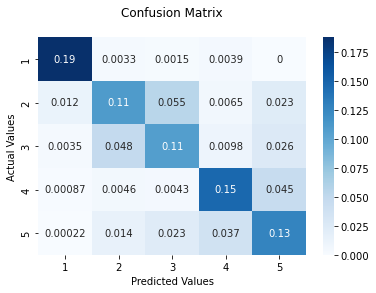

In [116]:
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5'])
ax.yaxis.set_ticklabels(['1', '2', '3', '4', '5'])

ax.plot()

In [128]:
print(accuracy)

{'KNN': 0.4473913043478261, 'Gaussian': 0.4326086956521739, 'SVM': 0.19521739130434781, 'DecisionTreeClassifier': 0.45413043478260867, 'RandomForest': 0.6780434782608695, 'RandomForestEntropy': 0.6856521739130435}
